In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil
import csv

from plotly.express import imshow

In [12]:
def analyze_image(img_path):
    img = cv2.imread(str(img_path))
    if img is None:
        return None
    h, w = img.shape[:2]
    top = img[0:h // 3, :]

    hsv = cv2.cvtColor(top, cv2.COLOR_BGR2HSV)
    h_ch, s_ch, v_ch = cv2.split(hsv)

    mean_sat = float(np.mean(s_ch))
    mean_val = float(np.mean(v_ch))
    std_val = float(np.std(v_ch))
    overexp_pct = float(np.sum(v_ch > 250) / v_ch.size * 100)

    gray_mask = (s_ch < 30) & (v_ch > 150)
    gray_pct = float(np.sum(gray_mask) / s_ch.size * 100)

    b = top[:, :, 0].astype(float)
    g = top[:, :, 1].astype(float)
    r = top[:, :, 2].astype(float)
    total = b + g + r + 1e-6
    blue_ratio = float(np.mean(b / total))

    return {
        "file": Path(img_path).name,
        "mean_sat": round(mean_sat, 1),
        "mean_val": round(mean_val, 1),
        "std_val": round(std_val, 1),
        "overexp_pct": round(overexp_pct, 1),
        "gray_pct": round(gray_pct, 1),
        "blue_ratio": round(blue_ratio, 3),
    }

def classify(m, min_sat=35, max_overexp=15.0, max_gray=40.0, min_blue=0.33):
    """
    Progi (dostosowane do IRCam MAGIC M1):
      min_sat=35     : ponizej = pochmurno/deszcz (czyste niebo: 50-100)
      max_overexp=15 : powyzej = silne przeswietlenie (normalne: 3-13%)
      max_gray=40    : powyzej = szare/mgliste niebo
      min_blue=0.33  : ponizej = swit/zachod/zlota godzina
    """
    reasons = []
    if m["mean_sat"] < min_sat:
        reasons.append("pochmurno/deszcz (sat=%d)" % int(m["mean_sat"]))
    if m["overexp_pct"] > max_overexp:
        reasons.append("przeswietlenie (%.1f%%)" % m["overexp_pct"])
    if m["gray_pct"] > max_gray:
        reasons.append("szare niebo (%.1f%%)" % m["gray_pct"])
    if m["blue_ratio"] < min_blue:
        reasons.append("brak blekitu (%.3f)" % m["blue_ratio"])
    if reasons:
        return "BAD", "; ".join(reasons)
    return "GOOD", ""

In [3]:
img_dir = Path("/media/pgliwny/ADATA HD3303/Computer_Vision_system/data/MAGIC/IRCam/IRCamera/2025/11/10/")
files = sorted(img_dir.glob("IRCamM1T*.jpg"))

In [21]:
for f in files[:35]:
    feat_dict = analyze_image(f)
    result = classify(feat_dict)
    img = cv2.imread(str(f))
   # plt.figure()
   # plt.imshow(img)
   # plt.show()
    print(str(f).split("/")[-1], end="\t")
    print(result)
    print(feat_dict)

IRCamM1T20251110_070000M.jpg	('BAD', 'pochmurno/deszcz (sat=0)')
{'file': 'IRCamM1T20251110_070000M.jpg', 'mean_sat': 0.0, 'mean_val': 144.0, 'std_val': 61.6, 'overexp_pct': 14.4, 'gray_pct': 34.3, 'blue_ratio': 0.333}
IRCamM1T20251110_071000M.jpg	('BAD', 'przeswietlenie (25.0%); brak blekitu (0.321)')
{'file': 'IRCamM1T20251110_071000M.jpg', 'mean_sat': 38.8, 'mean_val': 145.4, 'std_val': 75.1, 'overexp_pct': 25.0, 'gray_pct': 19.9, 'blue_ratio': 0.321}
IRCamM1T20251110_072000M.jpg	('BAD', 'pochmurno/deszcz (sat=27); przeswietlenie (29.4%); brak blekitu (0.329)')
{'file': 'IRCamM1T20251110_072000M.jpg', 'mean_sat': 27.6, 'mean_val': 157.6, 'std_val': 70.7, 'overexp_pct': 29.4, 'gray_pct': 27.6, 'blue_ratio': 0.329}
IRCamM1T20251110_073000M.jpg	('BAD', 'pochmurno/deszcz (sat=28); przeswietlenie (29.4%)')
{'file': 'IRCamM1T20251110_073000M.jpg', 'mean_sat': 28.1, 'mean_val': 154.7, 'std_val': 73.2, 'overexp_pct': 29.4, 'gray_pct': 26.4, 'blue_ratio': 0.331}
IRCamM1T20251110_074000M.jpg	

In [9]:
img = cv2.imread(str(files[5]))
h, w = img.shape[:2]
top = img[0:h // 3, :]

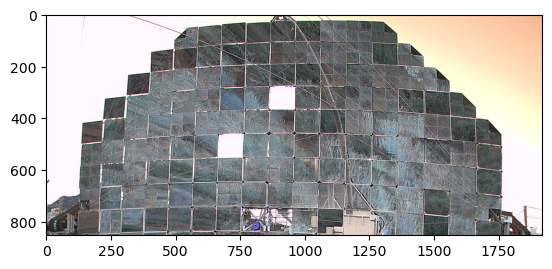

In [10]:
plt.imshow(top)